In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from torch.utils.data import random_split


In [2]:
dataset = pd.read_csv('preprocessed_dataset.csv')
dataset = dataset.dropna(subset=['content'])
dataset['content'] = dataset['content'].astype(str)

dataset['title'] = dataset['title'].fillna("").astype(str)
dataset['combined'] = dataset['title'] + ' ' + dataset['content']

X = dataset['combined']

y = dataset['gold_label']
# y = pd.get_dummies(y, prefix='', prefix_sep='').astype(int)
# y = np.array(y)
print(y)
# print(y.head())
# print(X)

vectorizer = CountVectorizer()

X_bow = vectorizer.fit_transform(X).toarray()
print(X_bow)


0       entertainment
1       entertainment
2       entertainment
3       entertainment
4       entertainment
            ...      
1278            world
1279            world
1280            world
1281            world
1282            world
Name: gold_label, Length: 1282, dtype: object
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.3, random_state=40)
# X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.15/0.85,random_state=40)
# print(y_train)
# print(X_test)

In [4]:
class LogisticRegressionManual:
    def __init__(self, learning_rate, epochs, reg_lambda):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.reg_lambda = reg_lambda
        self.losses = []
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def cross_entropy_loss(self, y_true, y_pred):
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        reg_loss = (self.reg_lambda / (2 * len(y_true))) * np.sum(self.weights ** 2)
        return loss + reg_loss
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            loss = self.cross_entropy_loss(y, y_pred)
            self.losses.append(loss)

            dw = (1 / m) * np.dot(X.T, (y_pred - y)) + (self.reg_lambda / m) * self.weights
            db = (1 / m) * np.sum(y_pred - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        probs = self.sigmoid(linear_model)  
        preds = (probs >= 0.5).astype(int)
        return preds, probs
    
    def evaluate(self,y_true,y_pred):
        misclassified_indices = np.where(y_true != y_pred)[0]
        print(misclassified_indices)
        # print("smd")
        accuracy = accuracy_score(y_true,y_pred)
        f1 = f1_score(y_true,y_pred)
        cm = confusion_matrix(y_true,y_pred)
        return accuracy,f1,cm


In [5]:
# One-vs-Rest Classifiers
arr = ["entertainment","business","world","sports","science-technology"]

classifiers = {}
losses = {}  # To store losses for each classifier
# print(y_train.values)
for i in range(5):
    y_binary = np.array((y_train == arr[i]).astype(int))  # Current positive class, use this while fitting to train data
    print(y_binary)
    # if i == 1:
    #     model = LogisticRegressionManual(learning_rate=0.01, epochs=100, reg_lambda=0.001)
    #     # print(y_binary.values)
    # else:
    model = LogisticRegressionManual(learning_rate=0.01, epochs=750, reg_lambda=0.001)
    
    classifiers[i] = model       # declare your logistic regression model here 
    model.fit(X_train, y_binary)  # fit on your training data and store the cost. You will need to pass y_binary along with the train data
    losses[i] = classifiers[i].losses            # Save the cost values for plotting
    print(f"Final loss for Class {i}: {losses[i][-1]}")




[1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0
 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

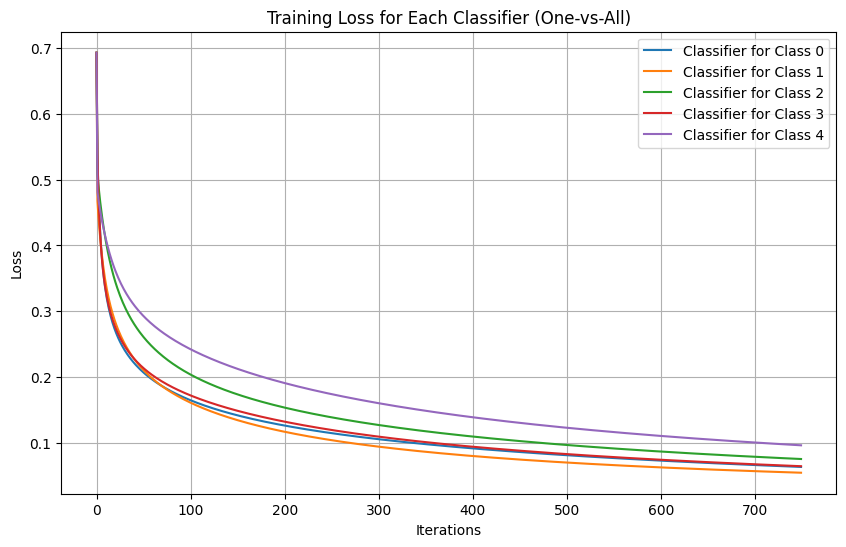

In [6]:
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(range(len(losses[i])), losses[i], label=f'Classifier for Class {i}')
plt.title('Training Loss for Each Classifier (One-vs-All)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [7]:
results = {
    'Class': [],
    'Probs':[],
    'Accuracy': [],
    'F1 Score': [],
    'Confusion Matrix': []
}

for i in range(5):  
    y_binary = np.array((arr[i] == y_test).astype(int))
    preds, probs = classifiers[i].predict(X_test)

    accuracy,f1,cm = classifiers[i].evaluate(y_binary,preds)  
    results['Class'].append(i)
    results['Probs'].append(probs)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)
    results['Confusion Matrix'].append(cm)

results_df = pd.DataFrame(results)


[  6  26  48 124 175 188 201 206 218 289 324 369]
[ 12  25  30  39  59  90  99 148 172 195 196 231 248 291 297 350]
[  2  29  36  42  64  83 217 269 289 303 351 359]
[  2  68  98 130 146 155 216 219 255 276 293 346 364]
[ 12  19  38  54  68  73  90 119 127 146 155 172 175 195 239 248 249 255
 271 277 290 328 334]


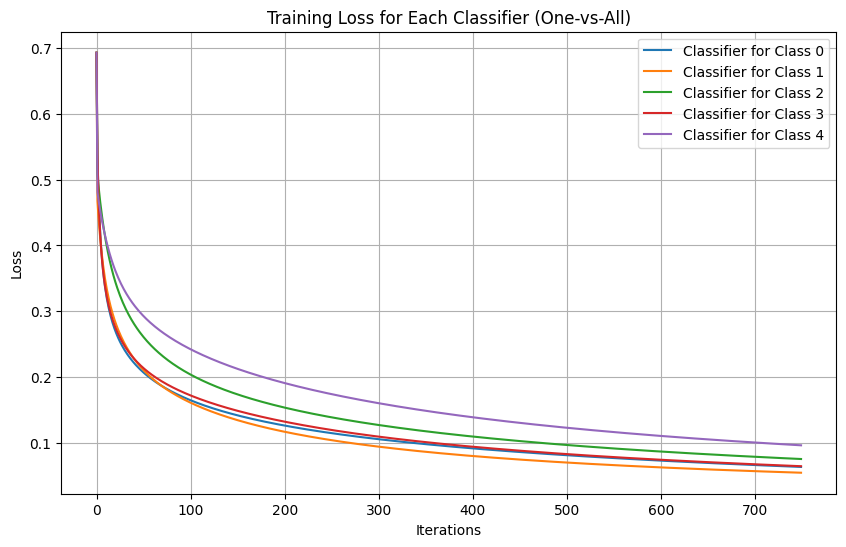

,Class,Accuracy,F1 Score,Confusion Matrix
0,0,0.968831,0.931818,"[[291, 2], [10, 82]]"
1,1,0.958442,0.911111,"[[287, 4], [12, 82]]"
2,2,0.968831,0.896552,"[[321, 4], [8, 52]]"
3,3,0.966234,0.910345,"[[306, 4], [9, 66]]"
4,4,0.940260,0.788991,"[[319, 2], [21, 43]]"


In [8]:
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(range(len(losses[i])), losses[i], label=f'Classifier for Class {i}')
plt.title('Training Loss for Each Classifier (One-vs-All)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
results_df.drop('Probs',axis=1)

In [9]:
combined_probs = np.column_stack([p for p in results['Probs']])

multi_class_pred = np.argmax(combined_probs, axis=1)
predicted_labels = [arr[pred] for pred in multi_class_pred]
print("Predicted Labels:", predicted_labels)
y_test = np.array(y_test)
y_new = []
# print(y_test)
for i in range(len(y_test)):
    if y_test[i] == "sports":
        y_new.append(3)
    elif y_test[i] == "entertainment":
        y_new.append(0)
    elif y_test[i] == "business":
       y_new.append(1)
    elif y_test[i] == "science-technology":
        y_new.append(4) 
    elif y_test[i] == "world":
       y_new.append(2)
print(y_new)


    

Predicted Labels: ['world', 'entertainment', 'world', 'entertainment', 'entertainment', 'world', 'entertainment', 'business', 'business', 'sports', 'sports', 'sports', 'business', 'world', 'business', 'business', 'sports', 'entertainment', 'entertainment', 'sports', 'entertainment', 'business', 'science-technology', 'entertainment', 'sports', 'business', 'entertainment', 'business', 'entertainment', 'world', 'science-technology', 'business', 'sports', 'business', 'science-technology', 'business', 'science-technology', 'sports', 'science-technology', 'business', 'entertainment', 'business', 'world', 'business', 'business', 'entertainment', 'world', 'world', 'entertainment', 'entertainment', 'world', 'world', 'world', 'sports', 'science-technology', 'business', 'world', 'sports', 'world', 'business', 'business', 'entertainment', 'world', 'sports', 'entertainment', 'entertainment', 'business', 'world', 'sports', 'entertainment', 'entertainment', 'entertainment', 'world', 'science-technolo

In [10]:
macro_f1 = f1_score(y_new, multi_class_pred, average='macro')
accuracy = accuracy_score(y_new, multi_class_pred,)

conf_matrix = confusion_matrix(y_new, multi_class_pred)
print(f"Macro F1 Score: {macro_f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Macro F1 Score: 0.92
Accuracy: 0.93
Confusion Matrix:
[[89  0  2  0  1]
 [ 0 90  0  0  4]
 [ 2  0 57  0  1]
 [ 0  1  3 71  0]
 [ 1  5  3  5 50]]


Predicted Labels: ['world', 'entertainment', 'world', 'entertainment', 'entertainment', 'world', 'entertainment', 'business', 'business', 'sports', 'sports', 'sports', 'business', 'world', 'business', 'business', 'sports', 'entertainment', 'entertainment', 'sports', 'entertainment', 'business', 'science-technology', 'entertainment', 'sports', 'business', 'entertainment', 'business', 'entertainment', 'world', 'science-technology', 'business', 'sports', 'business', 'science-technology', 'business', 'science-technology', 'sports', 'science-technology', 'business', 'entertainment', 'business', 'world', 'business', 'business', 'entertainment', 'world', 'world', 'entertainment', 'entertainment', 'world', 'world', 'world', 'sports', 'science-technology', 'business', 'world', 'sports', 'world', 'business', 'business', 'entertainment', 'world', 'sports', 'entertainment', 'entertainment', 'business', 'world', 'sports', 'entertainment', 'entertainment', 'entertainment', 'world', 'science-technolo

Macro F1 Score: 0.92
Accuracy: 0.93
Confusion Matrix:
[[89  0  2  0  1]
 [ 0 90  0  0  4]
 [ 2  0 57  0  1]
 [ 0  1  3 71  0]
 [ 1  5  3  5 50]]


In [ ]:
urdu = ""

In [ ]:
test_point = np.array([urdu])
test_point = vectorizer.transform(test_point).toarray()
print(test_point)


[[0 0 0 ... 0 0 0]]


In [ ]:
labels = {0: "entertainment", 1: "business", 2: "world",3:"sports" ,4:"science-technology" }
probs=[]
for i in range(5):  
    y_pred_class, prob = classifiers[i].predict(test_point)    
    probs.append(prob)
combined_probs = np.column_stack([p for p in probs])
multi_class_pred = np.argmax(combined_probs, axis=1)
print("Prediction:", labels[multi_class_pred[0]])

Prediction: entertainment


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

model = LogisticRegression(
    multi_class='multinomial',  
    solver='lbfgs',           
    max_iter=750,              
    random_state=40
)
print(X_train)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
                    precision    recall  f1-score   support

          business       0.94      0.93      0.93        94
     entertainment       0.96      0.97      0.96        92
science-technology       0.85      0.80      0.82        64
            sports       0.94      0.96      0.95        75
             world       0.92      0.95      0.93        60

          accuracy                           0.92       385
         macro avg       0.92      0.92      0.92       385
      weighted avg       0.92      0.92      0.92       385

Confusion Matrix:
[[87  0  6  0  1]
 [ 0 89  1  1  1]
 [ 6  2 51  4  1]
 [ 0  1  0 72  2]
 [ 0  1  2  0 57]]


In [ ]:
#   CODE FOR PLOTTING HEATMAP
arr = ["entertainment","business","world","sports","science-technology"]

classifiers = {}
losses = {}  
accuracies = []
lr = [0.1,0.01,0.001]
epochs = [500 , 750 ,1000]

for learning_rate in lr:
    print("learning rate  = ", learning_rate)
    for epcoh in epochs:
        print("epochs  = ",epcoh)
        for i in range(5):
                y_binary = np.array((y_train == arr[i]).astype(int))
                print(y_binary)
                
                model = LogisticRegressionManual(learning_rate=learning_rate, epochs=epcoh, reg_lambda=0.001)
                
                classifiers[i] = model      
                model.fit(X_train, y_binary) 
                losses[i] = classifiers[i].losses            
                print(f"Final loss for Class {i}: {losses[i][-1]}")

                results = {
                'Class': [],
                'Probs':[],
                'Accuracy': [],
                'F1 Score': [],
                'Confusion Matrix': []
                        }

        for i in range(5):  
            y_binary = np.array((arr[i] == y_test).astype(int))
            preds, probs = classifiers[i].predict(X_test)

            accuracy,f1,cm = classifiers[i].evaluate(y_binary,preds)  
            results['Class'].append(i)
            results['Probs'].append(probs)
            results['Accuracy'].append(accuracy)
            results['F1 Score'].append(f1)
            results['Confusion Matrix'].append(cm)

        results_df = pd.DataFrame(results)
        results_df.drop('Probs',axis=1)
        combined_probs = np.column_stack([p for p in results['Probs']])

        multi_class_pred = np.argmax(combined_probs, axis=1)
        predicted_labels = [arr[pred] for pred in multi_class_pred]
        print("Predicted Labels:", predicted_labels)
        y_test = np.array(y_test)
        y_new = []
      
        for i in range(len(y_test)):
            if y_test[i] == "sports":
                y_new.append(3)
            elif y_test[i] == "entertainment":
                y_new.append(0)
            elif y_test[i] == "business":
                y_new.append(1)
            elif y_test[i] == "science-technology":
                y_new.append(4) 
            elif y_test[i] == "world":
                 y_new.append(2)
        print(y_new)


        macro_f1 = f1_score(y_new, multi_class_pred, average='macro')
        accuracy = accuracy_score(y_new, multi_class_pred,)
        accuracies.append(accuracy)
        print("acc = ", accuracy)

        conf_matrix = confusion_matrix(y_new, multi_class_pred)

        print(f"Macro F1 Score: {macro_f1:.2f}")
        print(f"Accuracy: {accuracy:.2f}")
        print("Confusion Matrix:")
        print(conf_matrix)



    





learning rate  =  0.1
epochs  =  500
[1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0
 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 

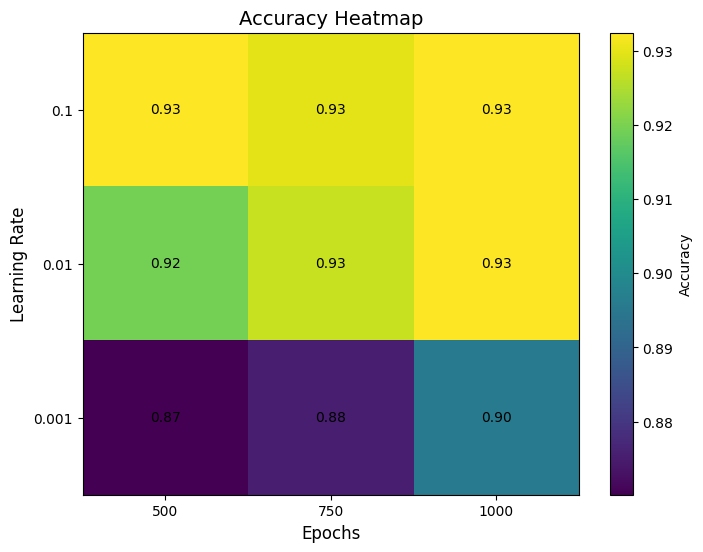

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

learning_rates = lr = [0.1,0.01,0.001]

epochs = [500, 750, 1000]  
accuracies = accuracies  

accuracy_matrix = np.array(accuracies).reshape(len(learning_rates), len(epochs))

plt.figure(figsize=(8, 6))
heatmap = plt.imshow(accuracy_matrix, aspect='auto')

plt.colorbar(heatmap, label='Accuracy')

plt.xticks(range(len(epochs)), labels=epochs, fontsize=10)
plt.yticks(range(len(learning_rates)), labels=learning_rates, fontsize=10)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Learning Rate', fontsize=12)
plt.title('Accuracy Heatmap', fontsize=14)

for i in range(len(learning_rates)):
    for j in range(len(epochs)):
        plt.text(j, i, f"{accuracy_matrix[i, j]:.2f}", ha='center', va='center', color='black', fontsize=10)

plt.show()
